In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
weights = [0, 120, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000]
value = [0, 140, 300, 580, 640, 740, 770, 800, 870, 880, 890, 900, 905, 915, 927, 925, 935, 945]
normalized_value = [x / 1023 * 5 for x in value]

def get_force (yvalues):
    x = weights
    y = normalized_value
    xinterp = np.interp(yvalues, y, x)
    
    return xinterp

In [35]:
def create_plot(x_values, y_values, title):
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Create the plot
    plt.plot(x_values, y_values)

    # Add labels and title
    plt.xlabel("Position (mm)")
    plt.ylabel("Force (grams)")
    plt.title(title)

    # Show the plot
    plt.show()

In [36]:
def distance_to_mm(distance_values, b):
    m = 0.04
    distance_mm = distance_values * m + b
    return distance_mm

In [37]:
def arduino_to_voltage(arduino_values):
    voltage_FSR = (arduino_values / 1023)*5
    return voltage_FSR

In [38]:
data_scissors = pd.read_csv("person_scissors_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_forceps = pd.read_csv("person_forceps_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_needle_holder = pd.read_csv("person_needle_holder_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_needle = pd.read_csv("person_needle_exp_1_trial_2.csv", encoding="latin", header=None, names=["position", "force"])
data_soft = pd.read_csv("person_soft_exp_1_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
data_hard = pd.read_csv("person_hard_exp_1_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
data_jeni_feedback = pd.read_csv("person_jeni_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
data_jeni = pd.read_csv("person_jeni_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

In [39]:
data_scissors = data_scissors.iloc[1:]
data_forceps = data_forceps.iloc[1:]
data_needle_holder = data_needle_holder.iloc[1:]
data_needle = data_needle.iloc[1:]
data_soft = data_soft.iloc[1:]
data_hard = data_hard.iloc[1:]
data_jeni_feedback = data_jeni_feedback.iloc[1:]
data_jeni = data_jeni.iloc[1:]


In [40]:
data_scissors_position_mm = distance_to_mm(data_scissors["position"], b = -7.86)
data_scissors_force = arduino_to_voltage(data_scissors["force"])
scissors_force = get_force(data_scissors_force)


In [43]:
d = {'distance': data_scissors_position_mm, 'force': scissors_force}
scissors = pd.DataFrame(d)

bin = data_scissors_position_mm['distance'].max() - data_scissors_position_mm['distance'].min()
print(bin)
scissors["bucket"] = pd.cut(scissors["distance"], )

print(scissors)

KeyError: 'distance'

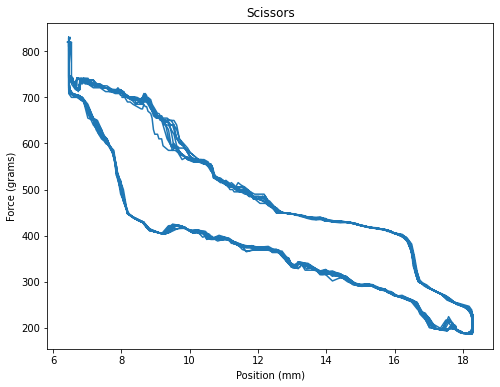

In [9]:
create_plot(data_scissors_position_mm, scissors_force, title = "Scissors")

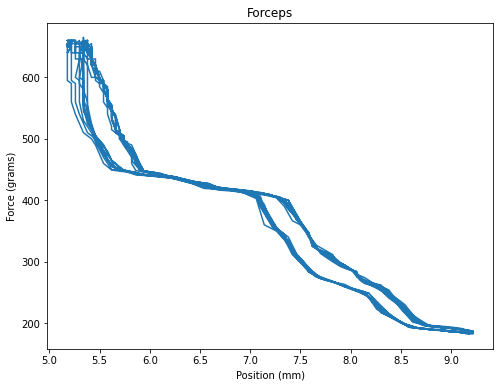

In [47]:
data_forceps_position_mm = distance_to_mm(data_forceps["position"],  b = -8.46)
data_forceps_force = arduino_to_voltage(data_forceps["force"])
forceps_force = get_force(data_forceps_force)
create_plot(data_forceps_position_mm, forceps_force, title = "Forceps")

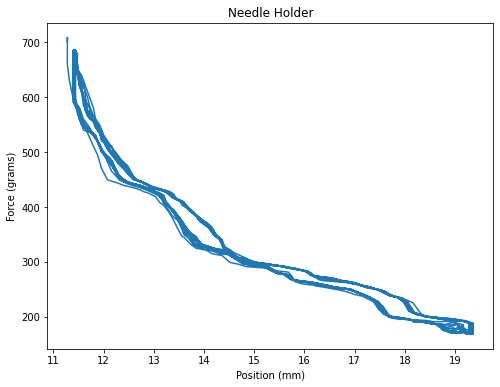

In [48]:
data_needle_holder_position_mm = distance_to_mm(data_needle_holder["position"], b = -7.52)
data_needle_holder_force = arduino_to_voltage(data_needle_holder["force"])
needle_holders_force = get_force(data_needle_holder_force)
create_plot(data_needle_holder_position_mm, needle_holders_force, title = "Needle Holder")

Text(0, 0.5, 'Force')

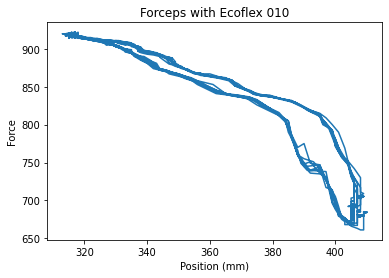

In [133]:
plt.plot(data_soft["position"], data_soft["force"])
plt.title("Forceps with Ecoflex 010")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

Text(0, 0.5, 'Force')

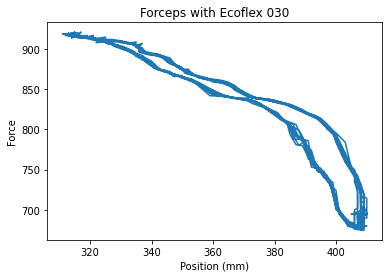

In [76]:
plt.plot(data_hard["position"], data_hard["force"])
plt.title("Forceps with Ecoflex 030")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

In [77]:
data_needle_holder["position"] = (data_needle_holder["position"] - 275) *0.04
data_needle_holder["force"] = (data_needle_holder["force"] / 1023)*5

Text(0, 0.5, 'Force')

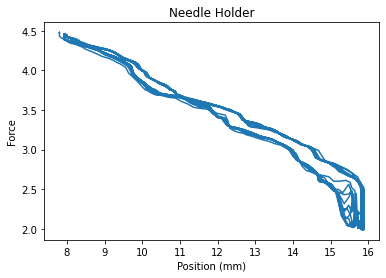

In [78]:
plt.plot(data_needle_holder["position"], data_needle_holder["force"])
plt.title("Needle Holder")
plt.xlabel("Position (mm)")
plt.ylabel("Force")

Text(0, 0.5, 'Force')

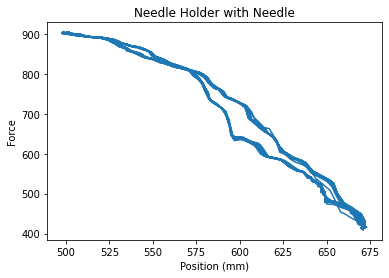

In [34]:
plt.plot(data_needle["position"], data_needle["force"])
plt.title("Needle Holder with Needle")
plt.xlabel("Position (mm)")
plt.ylabel("Force")